In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df2 = df[['month', 'day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','size_category']]
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [5]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder

le = LabelEncoder()

cols = ['month', 'day', 'size_category']

# Encode labels of multiple columns at once

df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)

# Print head

df2.head()

C:\Users\Tripti\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


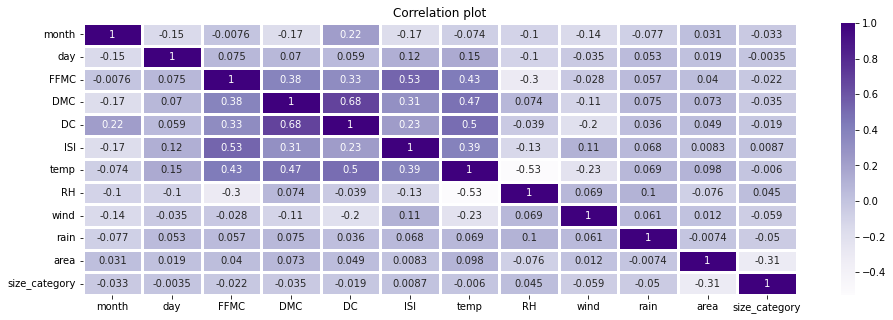

In [6]:
plt.figure(figsize = (16,5))
corr_plot = sns.heatmap(df2.corr(),annot = True,linewidths=3,cmap='Purples')
plt.title("Correlation plot")
plt.show()

In [7]:
df2.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [8]:
df2 = df2.dropna()

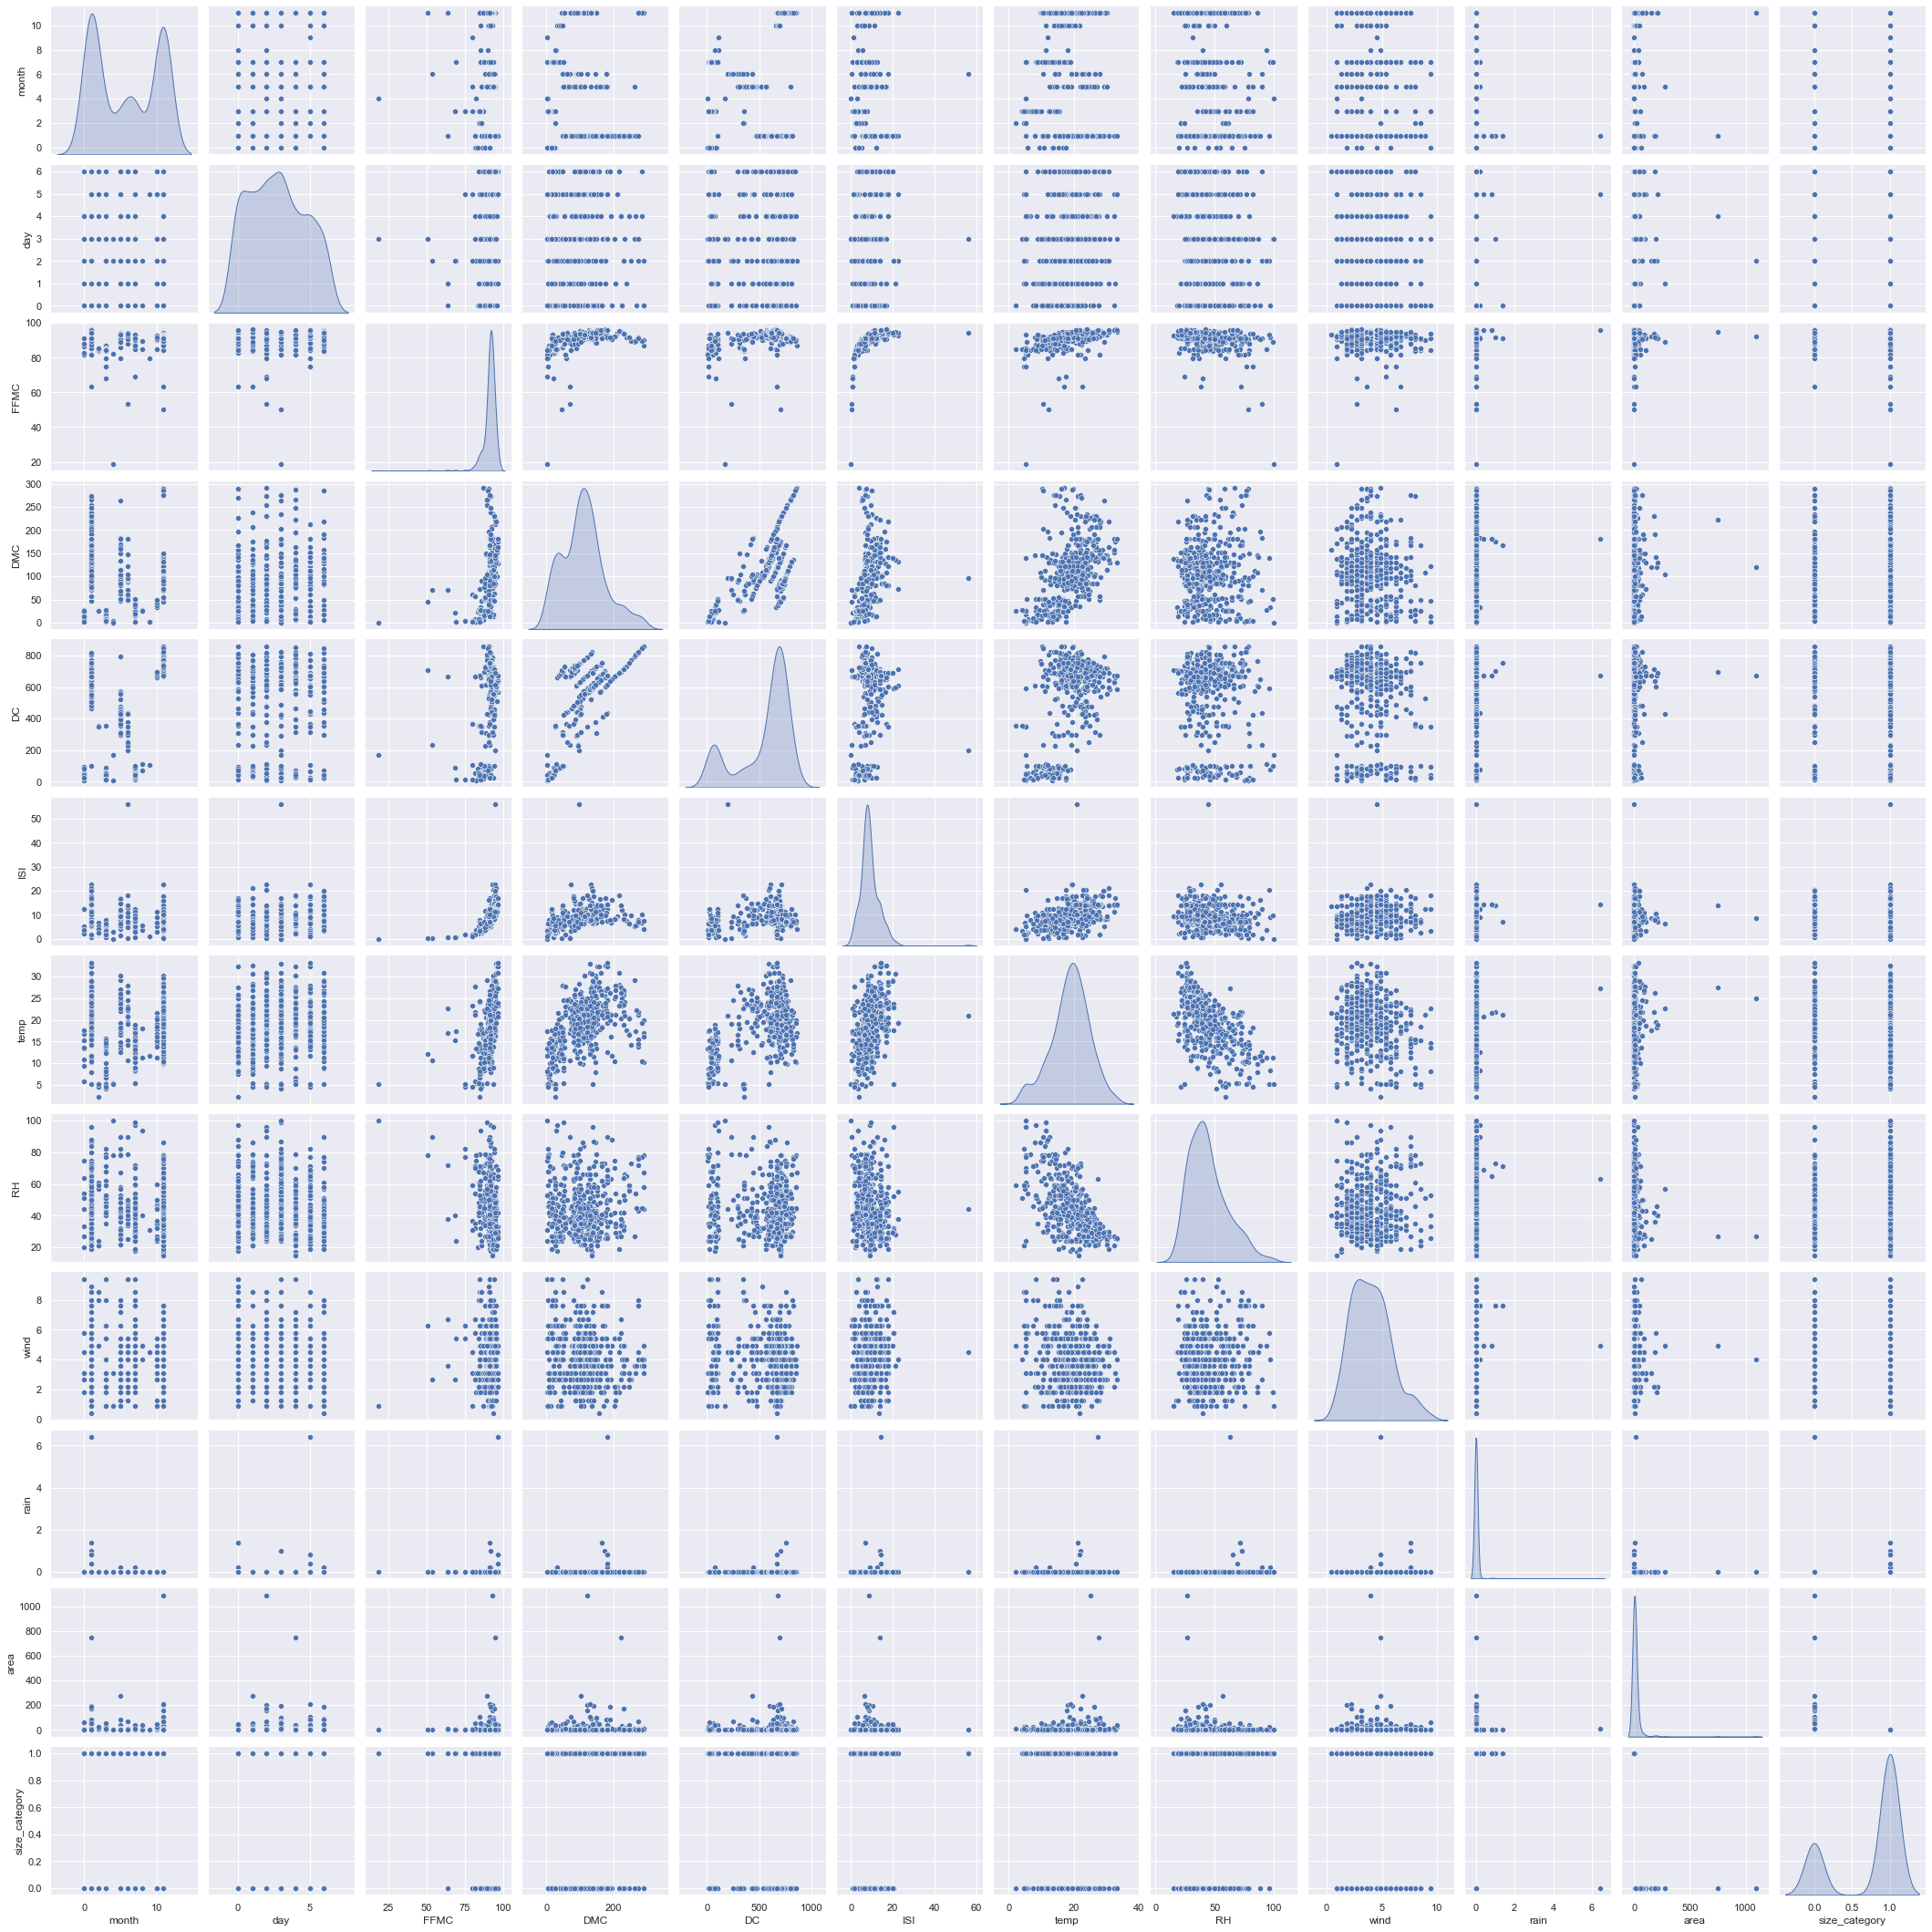

In [47]:
sns.set(rc={'figure.figsize':(20,15)})
sns.pairplot(df2, diag_kind='kde')   

In [10]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:,0:11]
y = df2.size_category
X_train, X_test, y_train, y_test = train_test_split(
     X,y, test_size=0.3, random_state=0)
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (361, 11)
train size y :  (361,)
test size X :  (156, 11)
test size y :  (156,)


In [11]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,361.0,5.761773,4.299713,0.0,1.0,6.00,11.00,11.00
day,361.0,2.739612,1.886740,0.0,1.0,3.00,4.00,6.00
FFMC,361.0,90.732964,5.587625,18.7,90.3,91.60,92.90,96.20
DMC,361.0,111.099169,64.584362,1.1,56.7,108.40,142.40,290.00
DC,361.0,541.738504,250.590063,7.9,430.8,661.30,713.00,855.30
ISI,361.0,9.054017,4.763570,0.0,6.5,8.40,10.70,56.10
temp,361.0,18.861773,5.864515,2.2,15.5,19.40,22.80,33.10
RH,361.0,43.955679,16.467923,15.0,32.0,41.00,53.00,100.00
wind,361.0,3.948476,1.805871,0.9,2.7,4.00,4.90,9.40
rain,361.0,0.026593,0.349224,0.0,0.0,0.00,0.00,6.40


In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[  5.762   2.74   90.733 111.099 541.738   9.054  18.862  43.956   3.948
    0.027  10.529]]


In [13]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(22,input_dim=11, activation='relu'),
      layers.Dense(11, activation='relu'),
      layers.Dense(1,activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
  return model

In [14]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 22)                264       
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 552
Trainable params: 529
Non-trainable params: 23
_________________________________________________________________


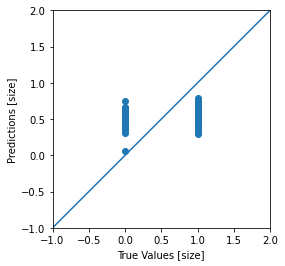

In [15]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [size]')
plt.ylabel('Predictions [size]')
lims = [-1, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

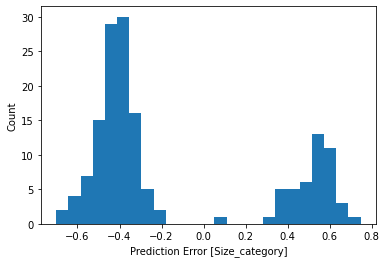

In [16]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Size_category]')
_ = plt.ylabel('Count')

# Hyperparameter tuning 
# batch size and epoch

In [17]:
from sklearn.preprocessing import StandardScaler
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [18]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(22, input_dim=11,  activation='relu'))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [19]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,50,100]
epochs = [10,30,50]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\Tripti\AppData\Local\Temp/ipykernel_4880/404511961.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   0.9s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.933 total time=   0.8s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.922 total time=   0.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.942 total time=   0.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.845 total time=   0.8s
[CV 1/5; 2/9] START batch_size=10, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=30;, score=0.990 total time=   1.7s
[CV 2/5; 2/9] START batch_size=10, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=30;, score=0.962 total time=   1.6s
[CV 3/5; 2/9] START batch_size=10, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=30;, score=0.942 total time=   1.7s
[CV 4/5; 2/9] START batch_size=10, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=30;, score=0.951 total time=   1.5s
[CV 5/5; 2/9] START batch_size=10, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=30;, score=0.913 total time=   1.5s
[CV 1/5; 3/9] START batch_size=10, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   2.3s
[CV 2/5; 3/9] START batch_size=10, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .....batch_size=10, epochs=50;, score=0.952 total time=   2.2s
[CV 3/5; 3/9] START batch_size=10, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .....batch_size=10, epochs=50;, score=0.961 total time=   2.2s
[CV 4/5; 3/9] START batch_size=10, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .....batch_size=10, epochs=50;, score=0.971 total time=   2.6s
[CV 5/5; 3/9] START batch_size=10, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .....batch_size=10, epochs=50;, score=0.893 total time=   2.3s
[CV 1/5; 4/9] START batch_size=50, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=50, epochs=10;, score=0.971 total time=   0.5s
[CV 2/5; 4/9] START batch_size=50, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=50, epochs=10;, score=0.788 total time=   0.5s
[CV 3/5; 4/9] START batch_size=50, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=50, epochs=10;, score=0.796 total time=   0.5s
[CV 4/5; 4/9] START batch_size=50, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=50, epochs=10;, score=0.796 total time=   0.7s
[CV 5/5; 4/9] START batch_size=50, epochs=10....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=50, epochs=10;, score=0.854 total time=   0.5s
[CV 1/5; 5/9] START batch_size=50, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=50, epochs=30;, score=1.000 total time=   0.7s
[CV 2/5; 5/9] START batch_size=50, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=50, epochs=30;, score=0.962 total time=   0.7s
[CV 3/5; 5/9] START batch_size=50, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=50, epochs=30;, score=0.932 total time=   0.7s
[CV 4/5; 5/9] START batch_size=50, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=50, epochs=30;, score=0.922 total time=   0.7s
[CV 5/5; 5/9] START batch_size=50, epochs=30....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=50, epochs=30;, score=0.913 total time=   0.7s
[CV 1/5; 6/9] START batch_size=50, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .....batch_size=50, epochs=50;, score=1.000 total time=   0.8s
[CV 2/5; 6/9] START batch_size=50, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .....batch_size=50, epochs=50;, score=0.933 total time=   0.9s
[CV 3/5; 6/9] START batch_size=50, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .....batch_size=50, epochs=50;, score=0.961 total time=   0.8s
[CV 4/5; 6/9] START batch_size=50, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .....batch_size=50, epochs=50;, score=0.932 total time=   0.9s
[CV 5/5; 6/9] START batch_size=50, epochs=50....................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .....batch_size=50, epochs=50;, score=0.913 total time=   1.1s
[CV 1/5; 7/9] START batch_size=100, epochs=10...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ....batch_size=100, epochs=10;, score=0.981 total time=   0.5s
[CV 2/5; 7/9] START batch_size=100, epochs=10...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ....batch_size=100, epochs=10;, score=0.740 total time=   0.5s
[CV 3/5; 7/9] START batch_size=100, epochs=10...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ....batch_size=100, epochs=10;, score=0.650 total time=   0.5s
[CV 4/5; 7/9] START batch_size=100, epochs=10...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ....batch_size=100, epochs=10;, score=0.728 total time=   0.5s
[CV 5/5; 7/9] START batch_size=100, epochs=10...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ....batch_size=100, epochs=10;, score=0.738 total time=   0.5s
[CV 1/5; 8/9] START batch_size=100, epochs=30...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ....batch_size=100, epochs=30;, score=1.000 total time=   0.6s
[CV 2/5; 8/9] START batch_size=100, epochs=30...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ....batch_size=100, epochs=30;, score=0.904 total time=   0.6s
[CV 3/5; 8/9] START batch_size=100, epochs=30...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ....batch_size=100, epochs=30;, score=0.913 total time=   0.6s
[CV 4/5; 8/9] START batch_size=100, epochs=30...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ....batch_size=100, epochs=30;, score=0.903 total time=   0.6s
[CV 5/5; 8/9] START batch_size=100, epochs=30...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ....batch_size=100, epochs=30;, score=0.864 total time=   0.8s
[CV 1/5; 9/9] START batch_size=100, epochs=50...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=100, epochs=50;, score=1.000 total time=   0.7s
[CV 2/5; 9/9] START batch_size=100, epochs=50...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=100, epochs=50;, score=0.933 total time=   0.7s
[CV 3/5; 9/9] START batch_size=100, epochs=50...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=100, epochs=50;, score=0.951 total time=   0.7s
[CV 4/5; 9/9] START batch_size=100, epochs=50...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ....batch_size=100, epochs=50;, score=0.913 total time=   0.7s
[CV 5/5; 9/9] START batch_size=100, epochs=50...................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ....batch_size=100, epochs=50;, score=0.874 total time=   0.7s


In [20]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9554331541061402, using {'batch_size': 10, 'epochs': 50}
0.9282860279083252,0.04974388410822359 with: {'batch_size': 10, 'epochs': 10}
0.9515496611595153,0.025374918190824967 with: {'batch_size': 10, 'epochs': 30}
0.9554331541061402,0.035049330177985456 with: {'batch_size': 10, 'epochs': 50}
0.8412434816360473,0.06914881986734622 with: {'batch_size': 50, 'epochs': 10}
0.9457057476043701,0.031705902564107685 with: {'batch_size': 50, 'epochs': 30}
0.9477035164833069,0.030389507790345414 with: {'batch_size': 50, 'epochs': 50}
0.7675317406654358,0.11165813217905712 with: {'batch_size': 100, 'epochs': 10}
0.9166915655136109,0.0448997686547517 with: {'batch_size': 100, 'epochs': 30}
0.9341112732887268,0.04182127494545784 with: {'batch_size': 100, 'epochs': 50}


# Learning rate and drop out rate

In [24]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(22,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\Tripti\AppData\Local\Temp/ipykernel_4880/3617986268.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   2.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.971 total time=   2.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.961 total time=   2.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.942 total time=   2.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.6s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.6s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.922 total time=   2.6s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.961 total time=   2.4s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.922 total time=   2.4s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   2.3s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.808 total time=   2.4s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.971 total time=   2.4s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.932 total time=   2.6s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.922 total time=   2.9s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.7s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.5s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.971 total time=   2.6s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.961 total time=   2.4s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.932 total time=   2.4s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   2.5s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.981 total time=   2.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.942 total time=   2.4s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.951 total time=   2.4s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.913 total time=   2.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.4s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.750 total time=   2.4s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   2.6s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.757 total time=   2.6s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.816 total time=   2.4s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   2.4s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.971 total time=   2.4s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.961 total time=   2.4s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.961 total time=   2.6s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.922 total time=   2.5s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   2.4s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.990 total time=   2.4s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.981 total time=   2.4s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.942 total time=   2.4s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.913 total time=   2.8s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   2.5s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   2.4s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.631 total time=   2.4s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.709 total time=   2.4s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.942 total time=   2.5s


In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9728342056274414, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9728342056274414,0.02074796604664455 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9611650466918945,0.03473504353118521 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9265869975090026,0.06562710265556802 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9728155374526978,0.025613405065230115 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9573188900947571,0.03048376321210915 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7694174766540527,0.15226012808802733 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9631628155708313,0.024884248102768142 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9650672197341919,0.032852303515500836 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8063106656074523,0.14089717389283182 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Activation function and Kernel initializer

In [26]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(22,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(11,input_dim =11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


C:\Users\Tripti\AppData\Local\Temp/ipykernel_4880/1409905896.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   2.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   2.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.748 total time=   2.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.738 total time=   2.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.990 total time=   2.5s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   2.8s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   2.6s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.748 total time=   2.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.757 total time=   2.7s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.3s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   2.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   2.6s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.748 total time=   2.4s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.806 total time=   2.3s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.990 total time=   2.5s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.981 total time=   2.3s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.961 total time=   2.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.971 total time=   2.4s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.942 total time=   2.4s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   2.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.990 total time=   2.3s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.971 total time=   2.3s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.971 total time=   2.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.903 total time=   2.4s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   2.5s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   2.5s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   2.3s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   2.2s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   2.3s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.2s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.990 total time=   2.4s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.3s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.951 total time=   2.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.942 total time=   2.3s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.3s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.981 total time=   2.3s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.3s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.961 total time=   2.7s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.951 total time=   2.3s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   2.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   2.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   2.3s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   2.3s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   2.4s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.4s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.3s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.990 total time=   2.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.981 total time=   2.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.951 total time=   2.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.981 total time=   2.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.961 total time=   2.3s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.961 total time=   2.2s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   2.3s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   2.2s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   2.3s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   2.5s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   2.3s


In [27]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.984466016292572, using {'activation_function': 'linear', 'init': 'uniform'}
0.7519417524337768,0.15072326914723128 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7539021730422973,0.1474589781017924 with: {'activation_function': 'softmax', 'init': 'normal'}
0.765533983707428,0.15190064130316072 with: {'activation_function': 'softmax', 'init': 'zero'}
0.968988049030304,0.016753566153704092 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9670089602470398,0.03397954042624512 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9767176985740662,0.025027847505349473 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9786781191825866,0.019805816067498445 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.984466016292572,0.01800702500674469 with: {'activati

# Number of neurons in activation layers

In [28]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters

neuron1 = [22,44,88]
neuron2 = [11,22,44]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\Tripti\AppData\Local\Temp/ipykernel_4880/473664573.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=22, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .......neuron1=22, neuron2=11;, score=1.000 total time=   2.6s
[CV 2/5; 1/9] START neuron1=22, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .......neuron1=22, neuron2=11;, score=0.990 total time=   2.4s
[CV 3/5; 1/9] START neuron1=22, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .......neuron1=22, neuron2=11;, score=1.000 total time=   2.5s
[CV 4/5; 1/9] START neuron1=22, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .......neuron1=22, neuron2=11;, score=0.961 total time=   2.4s
[CV 5/5; 1/9] START neuron1=22, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .......neuron1=22, neuron2=11;, score=0.932 total time=   2.3s
[CV 1/5; 2/9] START neuron1=22, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .......neuron1=22, neuron2=22;, score=1.000 total time=   2.3s
[CV 2/5; 2/9] START neuron1=22, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .......neuron1=22, neuron2=22;, score=0.981 total time=   2.3s
[CV 3/5; 2/9] START neuron1=22, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .......neuron1=22, neuron2=22;, score=1.000 total time=   2.4s
[CV 4/5; 2/9] START neuron1=22, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .......neuron1=22, neuron2=22;, score=0.961 total time=   2.6s
[CV 5/5; 2/9] START neuron1=22, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .......neuron1=22, neuron2=22;, score=0.942 total time=   2.4s
[CV 1/5; 3/9] START neuron1=22, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .......neuron1=22, neuron2=44;, score=1.000 total time=   2.4s
[CV 2/5; 3/9] START neuron1=22, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .......neuron1=22, neuron2=44;, score=0.981 total time=   2.8s
[CV 3/5; 3/9] START neuron1=22, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .......neuron1=22, neuron2=44;, score=0.990 total time=   2.4s
[CV 4/5; 3/9] START neuron1=22, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .......neuron1=22, neuron2=44;, score=0.951 total time=   2.3s
[CV 5/5; 3/9] START neuron1=22, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .......neuron1=22, neuron2=44;, score=0.971 total time=   2.5s
[CV 1/5; 4/9] START neuron1=44, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .......neuron1=44, neuron2=11;, score=1.000 total time=   2.4s
[CV 2/5; 4/9] START neuron1=44, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .......neuron1=44, neuron2=11;, score=0.962 total time=   2.4s
[CV 3/5; 4/9] START neuron1=44, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .......neuron1=44, neuron2=11;, score=1.000 total time=   2.6s
[CV 4/5; 4/9] START neuron1=44, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .......neuron1=44, neuron2=11;, score=0.961 total time=   2.3s
[CV 5/5; 4/9] START neuron1=44, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .......neuron1=44, neuron2=11;, score=0.961 total time=   2.5s
[CV 1/5; 5/9] START neuron1=44, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .......neuron1=44, neuron2=22;, score=1.000 total time=   2.4s
[CV 2/5; 5/9] START neuron1=44, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .......neuron1=44, neuron2=22;, score=1.000 total time=   2.5s
[CV 3/5; 5/9] START neuron1=44, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .......neuron1=44, neuron2=22;, score=1.000 total time=   2.5s
[CV 4/5; 5/9] START neuron1=44, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .......neuron1=44, neuron2=22;, score=0.961 total time=   2.3s
[CV 5/5; 5/9] START neuron1=44, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .......neuron1=44, neuron2=22;, score=0.971 total time=   2.5s
[CV 1/5; 6/9] START neuron1=44, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .......neuron1=44, neuron2=44;, score=1.000 total time=   2.4s
[CV 2/5; 6/9] START neuron1=44, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .......neuron1=44, neuron2=44;, score=1.000 total time=   2.3s
[CV 3/5; 6/9] START neuron1=44, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .......neuron1=44, neuron2=44;, score=0.990 total time=   2.5s
[CV 4/5; 6/9] START neuron1=44, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .......neuron1=44, neuron2=44;, score=0.971 total time=   2.4s
[CV 5/5; 6/9] START neuron1=44, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .......neuron1=44, neuron2=44;, score=0.903 total time=   2.3s
[CV 1/5; 7/9] START neuron1=88, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .......neuron1=88, neuron2=11;, score=1.000 total time=   2.3s
[CV 2/5; 7/9] START neuron1=88, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .......neuron1=88, neuron2=11;, score=0.971 total time=   2.3s
[CV 3/5; 7/9] START neuron1=88, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .......neuron1=88, neuron2=11;, score=1.000 total time=   2.3s
[CV 4/5; 7/9] START neuron1=88, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .......neuron1=88, neuron2=11;, score=0.981 total time=   2.7s
[CV 5/5; 7/9] START neuron1=88, neuron2=11......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .......neuron1=88, neuron2=11;, score=0.961 total time=   3.3s
[CV 1/5; 8/9] START neuron1=88, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .......neuron1=88, neuron2=22;, score=1.000 total time=   2.7s
[CV 2/5; 8/9] START neuron1=88, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .......neuron1=88, neuron2=22;, score=0.971 total time=   3.5s
[CV 3/5; 8/9] START neuron1=88, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .......neuron1=88, neuron2=22;, score=0.990 total time=   2.7s
[CV 4/5; 8/9] START neuron1=88, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .......neuron1=88, neuron2=22;, score=0.981 total time=   3.0s
[CV 5/5; 8/9] START neuron1=88, neuron2=22......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .......neuron1=88, neuron2=22;, score=0.961 total time=   2.8s
[CV 1/5; 9/9] START neuron1=88, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .......neuron1=88, neuron2=44;, score=1.000 total time=   2.5s
[CV 2/5; 9/9] START neuron1=88, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .......neuron1=88, neuron2=44;, score=0.990 total time=   2.4s
[CV 3/5; 9/9] START neuron1=88, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .......neuron1=88, neuron2=44;, score=1.000 total time=   2.3s
[CV 4/5; 9/9] START neuron1=88, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .......neuron1=88, neuron2=44;, score=0.951 total time=   2.3s
[CV 5/5; 9/9] START neuron1=88, neuron2=44......................................


C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .......neuron1=88, neuron2=44;, score=0.942 total time=   2.3s


In [29]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864077687263488, using {'neuron1': 44, 'neuron2': 22}
0.9767177104949951,0.026491510636519597 with: {'neuron1': 22, 'neuron2': 11}
0.9767363667488098,0.022651004281711858 with: {'neuron1': 22, 'neuron2': 22}
0.9786781072616577,0.016708049667640543 with: {'neuron1': 22, 'neuron2': 44}
0.976773715019226,0.018964672315790836 with: {'neuron1': 44, 'neuron2': 11}
0.9864077687263488,0.016927758771990948 with: {'neuron1': 44, 'neuron2': 22}
0.9728155255317688,0.036533762155290604 with: {'neuron1': 44, 'neuron2': 44}
0.9825802922248841,0.01549231197167874 with: {'neuron1': 88, 'neuron2': 11}
0.9806385397911072,0.013691012393103283 with: {'neuron1': 88, 'neuron2': 22}
0.9767176985740662,0.025027847505349473 with: {'neuron1': 88, 'neuron2': 44}


# Final model

In [43]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(44,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(22,input_dim =44,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

C:\Users\Tripti\AppData\Local\Temp/ipykernel_4880/2680430161.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)
C:\Users\Tripti\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.988394584139265


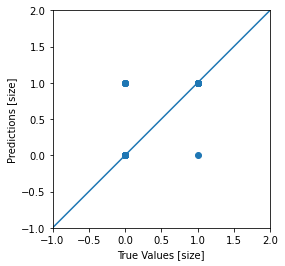

In [44]:
a2 = plt.axes(aspect='equal')
plt.scatter(y, y_predict)
plt.xlabel('True Values [size]')
plt.ylabel('Predictions [size]')
lims = [-1, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [45]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_predict)
print (confusion_matrix)

[[134   5]
 [  1 377]]
